In [28]:
import imblearn
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn import metrics
import time
from joblib import dump, load
from matplotlib import pyplot as plt
import os

In [107]:
def fit_model(model, xs_train, xs_test, ys_train, ys_test, mode, method):
    if mode == 'save':
        model.fit(xs_train, ys_train.ravel())
        dump(model, os.path.join('models', method + '.joblib'))
    print(f"Rezultat trening skupa: {model.score(xs_train, ys_train):.3f}")
    print(f"Rezultat test skupa: {model.score(xs_test, ys_test):.3f}")
    return model.feature_importances_


def prediction(model, x_train, x_test, y_train, y_test):
    y_train_predicted = model.predict(x_train)
    y_test_predicted = model.predict(x_test)
    print("Matrica kofuzije trening skupa:\n" + str(confusion_matrix(y_train, y_train_predicted)))
    print("Matrica kofuzije test skupa:\n" + str(confusion_matrix(y_test, y_test_predicted)))
    print("Metrika: \n" + str(metrics.classification_report(y_test, y_test_predicted)))


# K nearest neighbours
def knn(x_train, x_test, y_train, y_test, non, mode, rtype):
    print("-----K najblizih suseda: " + rtype + " -----")
    start = time.time()
    if mode == 'load':
        model = load(os.path.join('models', 'knn_' + rtype + '.joblib'))
    else:
        model = KNeighborsClassifier(n_neighbors=non, weights='uniform')
    fit_model(model, x_train, x_test, y_train, y_test, mode, 'knn_' + rtype)
    prediction(model, x_train, x_test, y_train, y_test)
    print(f"Vreme izvrsavanja: {time.time()-start:.3f} \n")


# Decision tree classifier
def dtc(xs_train, xs_test, ys_train, ys_test, mode, rtype, criteria, depth):
    print("-----Drvo odlucivanja: " + rtype + " -----")
    start = time.time()
    if mode == 'load':
        model = load(os.path.join('models', 'dtc_' + rtype + '.joblib'))
    else:
        model = DecisionTreeClassifier(criterion=criteria, max_depth=depth)
    model_feature_importances = fit_model(model, xs_train, xs_test, ys_train, ys_test, mode, 'dtc_' + rtype)
    prediction(model, xs_train, xs_test, ys_train, ys_test)
    print(f"Vreme izvrsavanja: {time.time() - start:.3f} \n")
    return model_feature_importances
    

# Random forest classifier
def rfc(x_train, x_test, y_train, y_test, n_est, mode, rtype, maxd):
    print("-----Nasumicna suma: " + rtype + " -----")
    start = time.time()
    if mode == 'load':
        model = load(os.path.join('models', 'rfc_' + rtype + '.joblib'))
    else:
        model = RandomForestClassifier(n_estimators=n_est, max_depth=maxd, criterion='gini')
    fit_model(model, x_train, x_test, y_train, y_test, mode, 'rfc_' + rtype)
    prediction(model, x_train, x_test, y_train, y_test)
    print(f"Vreme izvrsavanja: {time.time() - start:.3f} \n")

In [57]:
# load data
file = 'data_for_classification.csv'
df = pd.read_csv(file)

In [11]:
print(df.describe())

             url_len   tld_in_known  tld_in_abused     contain_ip  \
count  411263.000000  411263.000000  411263.000000  411263.000000   
mean       48.428648       0.988757       0.001734       0.000109   
std        35.063820       0.105437       0.041601       0.010460   
min         1.000000       0.000000       0.000000       0.000000   
25%        29.000000       1.000000       0.000000       0.000000   
50%        41.000000       1.000000       0.000000       0.000000   
75%        59.000000       1.000000       0.000000       0.000000   
max      2307.000000       1.000000       1.000000       1.000000   

        deep_url_len  num_of_gen_deli  num_of_sub_deli  num_of_reserved_char  \
count  411263.000000    411263.000000    411263.000000         411263.000000   
mean       32.546478         1.154633         0.244892              1.399525   
std        34.587544         0.390959         0.597133              0.926967   
min         1.000000         0.000000         0.000000    

In [12]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411263 entries, 0 to 411262
Data columns (total 22 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   url                                     411263 non-null  object 
 1   url_len                                 411263 non-null  int64  
 2   tld_in_known                            411263 non-null  int64  
 3   tld_in_abused                           411263 non-null  int64  
 4   contain_ip                              411263 non-null  int64  
 5   deep_url_len                            411263 non-null  int64  
 6   num_of_gen_deli                         411263 non-null  int64  
 7   num_of_sub_deli                         411263 non-null  int64  
 8   num_of_reserved_char                    411263 non-null  int64  
 9   num_of_unreserved_spec_char             411263 non-null  int64  
 10  num_of_sub_domains                      4112

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A40CFC92E0>,
      dtype=object)

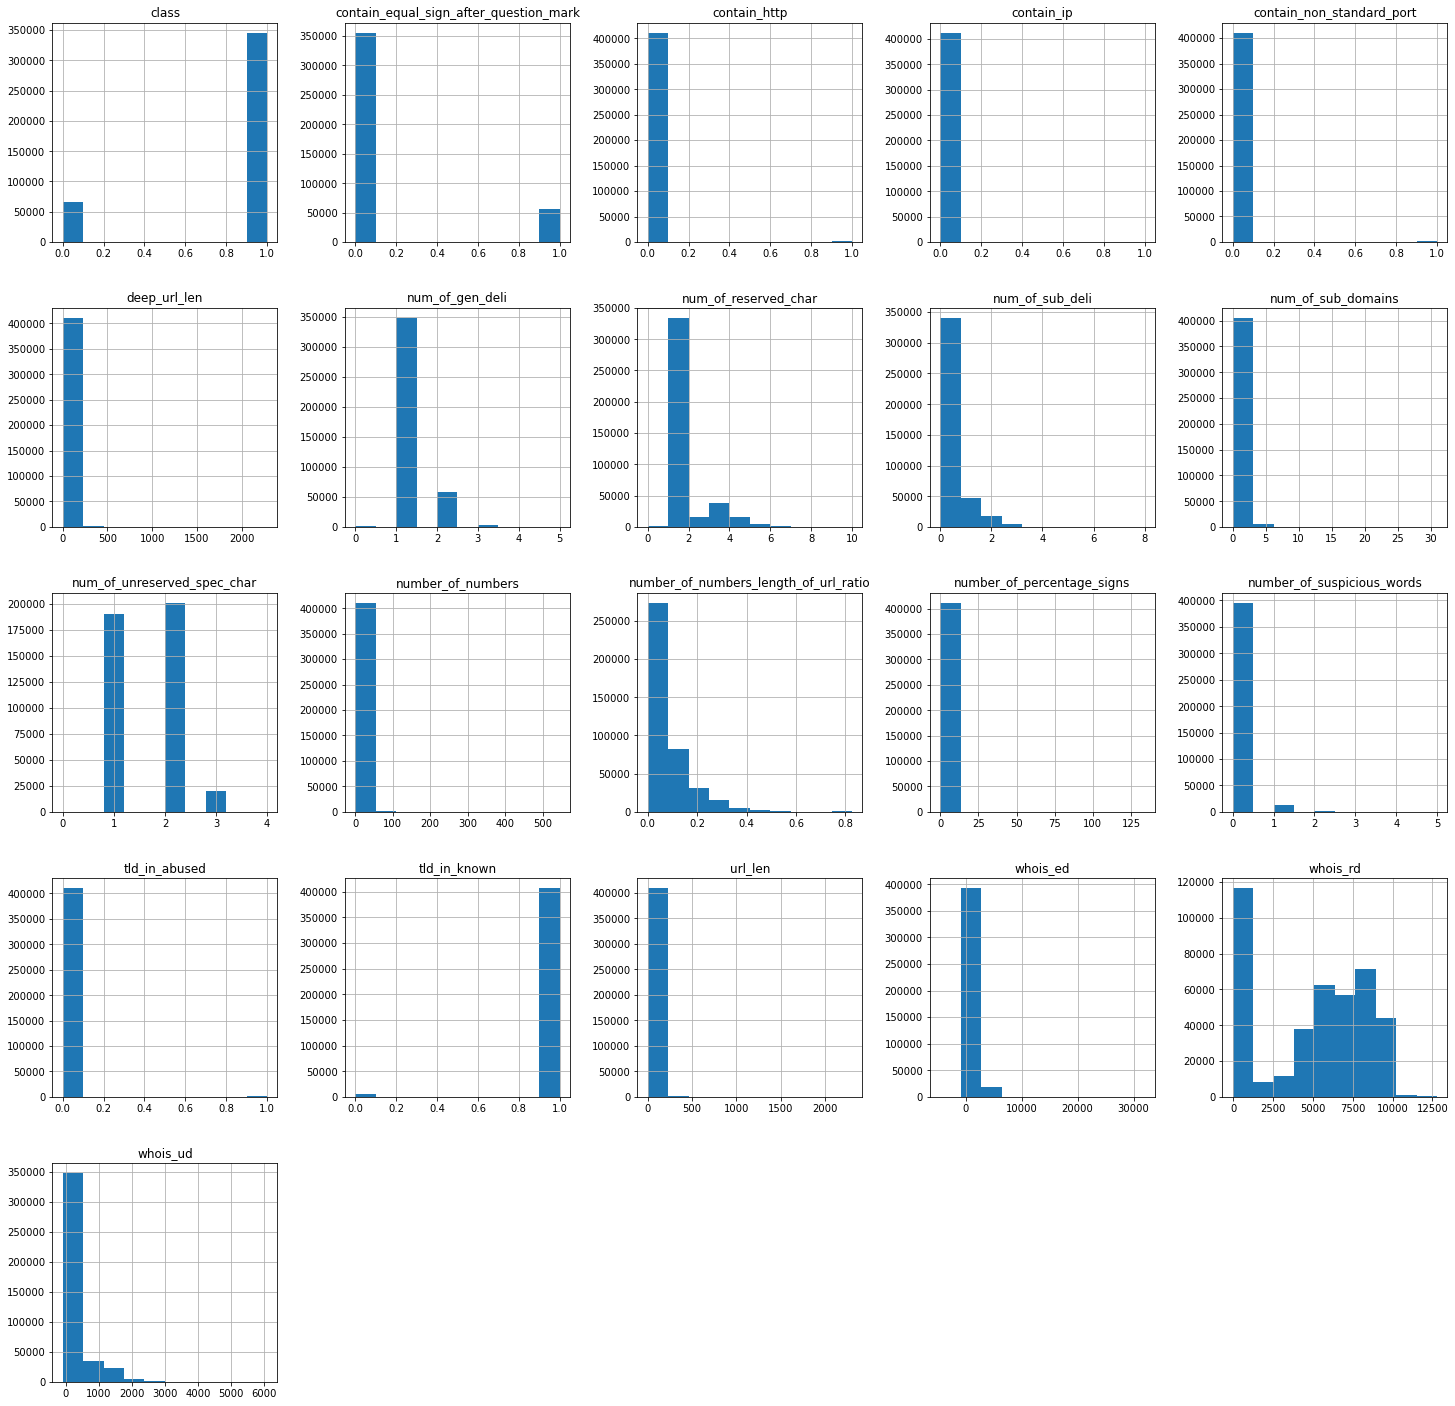

In [53]:
# show graphic data
df.hist(figsize = [25,25])

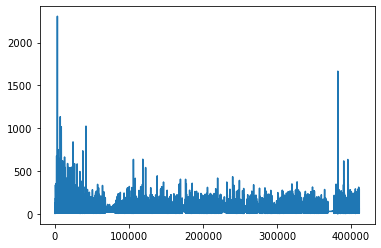

In [64]:
# Plot url lengths
plt.plot(np.arange(0, df['url_len'].shape[0]), df['url_len'])

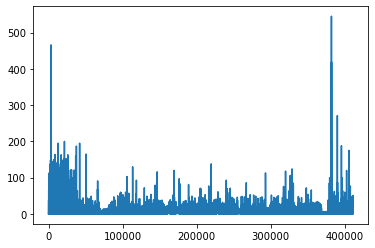

In [65]:
# Plot number of digits in url
plt.plot(np.arange(0, df['number_of_numbers'].shape[0]), df['number_of_numbers'])

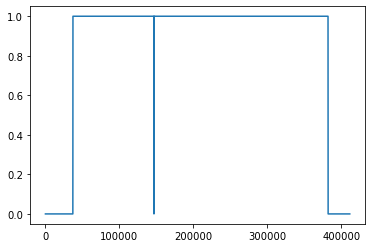

In [88]:
# data classes
plt.plot(np.arange(0, df['class'].shape[0]), df['class'])

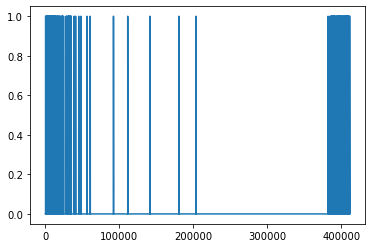

In [73]:
# does data's url have abused tld
plt.plot(np.arange(0, df['tld_in_abused'].shape[0]), df['tld_in_abused'])

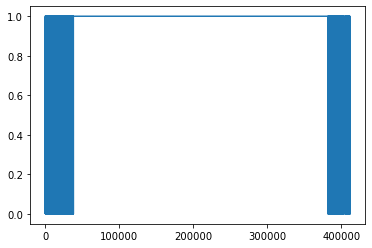

In [85]:
# does data's url have tld from known tlds list
plt.plot(np.arange(0, df['tld_in_known'].shape[0]), df['tld_in_known'])

In [39]:
x = df.loc[:, df.columns != 'url']  # string
x = x.loc[:, x.columns != 'class']  # class

In [40]:
number_of_features = x.shape[1]
feature_names = list(x.columns)

In [41]:
print(x.corr())

                                         url_len  tld_in_known  tld_in_abused  \
url_len                                 1.000000      0.054655       0.017623   
tld_in_known                            0.054655      1.000000       0.004444   
tld_in_abused                           0.017623      0.004444       1.000000   
contain_ip                             -0.010510     -0.098099      -0.000436   
deep_url_len                            0.983431      0.041488       0.012436   
num_of_gen_deli                         0.277748      0.023596       0.027620   
num_of_sub_deli                         0.349419      0.028439      -0.000060   
num_of_reserved_char                    0.342232      0.028272       0.011611   
num_of_unreserved_spec_char             0.397850      0.077650      -0.008112   
num_of_sub_domains                      0.478932      0.026997       0.004802   
contain_http                            0.259301      0.003289       0.000234   
number_of_suspicious_words  

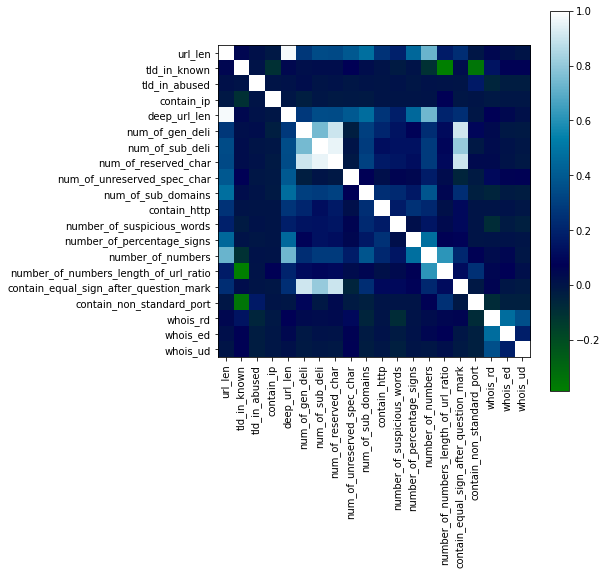

In [45]:
plt.figure(figsize = (7, 7))
plt.xticks(range(0, number_of_features), feature_names, rotation='vertical')
plt.yticks(range(0, number_of_features), feature_names)
plt.imshow(x.corr(), cmap='ocean')
plt.colorbar()
plt.show()

In [22]:
x = x.loc[:, x.columns != 'deep_url_len']  # correlation with url_len is 0.98
x = x.loc[:, x.columns != 'num_of_reserved_char']  # correlation with num_of_sub_deli is 0.96

x = x.values[:, :]
y = df.values[:, -1]
y = y.astype('int')

In [8]:
# getting 3 datasets: training, validation and test
x_train_val, x_test, y_train_val, y_test = train_test_split(x, y, test_size=0.3, stratify=y)
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.2, stratify=y_train_val)

In [9]:
scaler = preprocessing.StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_val = scaler.transform(x_val)
x_test = scaler.transform(x_test)

In [82]:
# Using validation dataset to chose the best meta data for randomm forest
n_est = [5, 10, 20, 50, 75, 100]
max_depths = [None, 5, 10, 20]
models = {}
for n in n_est:
    for max_d in max_depths:
        model = RandomForestClassifier(n_estimators=n, max_depth=max_d, criterion='gini')
        model.fit(x_train, y_train)
        f1_score = metrics.f1_score(y_val, model.predict(x_val))
        print(str(n) + " " + str(max_d) + " " + str(f1_score))
        models[str(n) + " " + str(max_d)] = f1_score

5 None 0.9617682688951399
5 5 0.9328526450810433
5 10 0.9508721681882372
5 20 0.9616898371792656
10 None 0.963766400823257
10 5 0.9345983554712207
10 10 0.9536976522045146
10 20 0.9631250572513256
20 None 0.9647551758133421
20 5 0.9365726207420982
20 10 0.9537629020943981
20 20 0.963688655372514
50 None 0.9653856412992182
50 5 0.9354502711069145
50 10 0.9532471166723301
50 20 0.9642178046672428
75 None 0.9654833054835105
75 5 0.9354279481086135
75 10 0.9527409830833068
75 20 0.9645553136508841
100 None 0.9657379016131183
100 5 0.9357398051069381
100 10 0.9531510486857736
100 20 0.9647425135077383


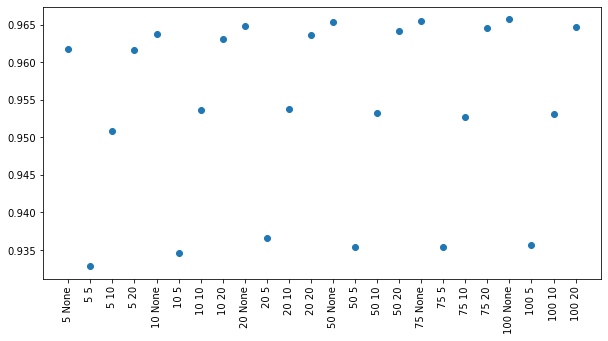

In [100]:
N = len(models)
plt.figure(figsize = (10, 5))
plt.scatter(np.arange(0, N), list(models.values()))
plt.xticks(np.arange(0, N), list(models.keys()), rotation='vertical')
plt.show()

In [ ]:
# We can see that the best result is for forest that have 75 trees and unlimited depth
# Also we can determine that with lowering maximal depth of tree, results are getting worse

In [16]:
# Using validation dataset to chose the best meta data for k neighbors
non = [1, 2, 3, 5, 7, 10, 20]
for n in non:
    model = KNeighborsClassifier(n_neighbors=n, weights='uniform')
    model.fit(x_train, y_train)
    f1_score = metrics.f1_score(y_val, model.predict(x_val))
    print(f1_score)

0.9492091986752916
0.9378218577150486
0.9492039423805912
0.9504145700490965
0.9497377089178968
0.9478814381903078
0.9468790828159656


In [29]:
# The best results are for classification with 5 neighbors
# I didn't try for more than 20, because this was already taking a lot more time to execute,
# and it didn't give better results

In [10]:
# Dataset is unbalanced, so we are using under and over sampling to get dataset of closer ratio

# Undersampling 
ratio = 1/2
friends_ros = imblearn.under_sampling.RandomUnderSampler(random_state=0, sampling_strategy=ratio)
x_train_ros, y_train_ros = friends_ros.fit_resample(x_train, y_train)
x_test_ros, y_test_ros = friends_ros.fit_resample(x_test, y_test)

# Oversampling
smote = imblearn.over_sampling.SMOTE(random_state=0, k_neighbors=5)
x_train_res_smote, y_train_res_smote = smote.fit_resample(x_train, y_train)
x_test_res_smote, y_test_res_smote = smote.fit_resample(x_test, y_test)

In [11]:
# Making models for desicion tree and saving feature importance for more details
normal_dtc_feature_importances = dtc(x_train, x_test, y_train, y_test, mode='save', rtype='NormalGiniNone', criteria='gini', depth=None)
ros_dtc_feature_importances = dtc(x_train_ros, x_test, y_train_ros, y_test, mode='save', rtype='RatioGiniNone', criteria='gini', depth=None)
smote_dtc_feature_importances = dtc(x_train_res_smote, x_test, y_train_res_smote, y_test, mode='save', rtype='SmoteGiniNone', criteria='gini', depth=None)

-----Drvo odlucivanja: NormalGiniNone -----
Rezultat trening skupa: 0.982
Rezultat test skupa: 0.925
Matrica kofuzije trening skupa:
[[ 35073   2147]
 [  1958 191129]]
Matrica kofuzije test skupa:
[[15362  4577]
 [ 4628 98812]]
Metrika: 
              precision    recall  f1-score   support

           0       0.77      0.77      0.77     19939
           1       0.96      0.96      0.96    103440

    accuracy                           0.93    123379
   macro avg       0.86      0.86      0.86    123379
weighted avg       0.93      0.93      0.93    123379

Vreme izvrsavanja: 2.386 

-----Drvo odlucivanja: RatioGiniNone -----
Rezultat trening skupa: 0.978
Rezultat test skupa: 0.904
Matrica kofuzije trening skupa:
[[36095  1125]
 [ 1363 73077]]
Matrica kofuzije test skupa:
[[16779  3160]
 [ 8732 94708]]
Metrika: 
              precision    recall  f1-score   support

           0       0.66      0.84      0.74     19939
           1       0.97      0.92      0.94    103440

    accurac

In [42]:
# Making models for desicion tree
dtc(x_train, x_test, y_train, y_test, mode='save', rtype='NormalEntropyNone', criteria='entropy', depth=None)
dtc(x_train_ros, x_test, y_train_ros, y_test, mode='save', rtype='RatioEntropyNone', criteria='entropy', depth=None)
dtc(x_train_res_smote, x_test, y_train_res_smote, y_test, mode='save', rtype='SmoteEntropyNone', criteria='entropy', depth=None)

-----Drvo odlucivanja: NormalEntropyNone -----
[7.58677582e-02 1.19770642e-02 4.92917523e-03 7.03126514e-05
 1.18727079e-01 4.54096084e-03 1.72412772e-02 1.01367304e-02
 5.21436478e-02 5.21481845e-02 2.82408015e-03 7.03006205e-02
 5.74065524e-03 3.54982816e-02 8.51984049e-02 6.27814915e-03
 3.21034038e-04 3.26631213e-01 5.60897404e-02 6.33356309e-02]
Rezultat trening skupa: 0.982
Rezultat test skupa: 0.927
Matrica kofuzije trening skupa:
[[ 35027   2106]
 [  2095 191079]]
Matrica kofuzije test skupa:
[[15632  4453]
 [ 4531 98763]]
Metrika: 
              precision    recall  f1-score   support

           0       0.78      0.78      0.78     20085
           1       0.96      0.96      0.96    103294

    accuracy                           0.93    123379
   macro avg       0.87      0.87      0.87    123379
weighted avg       0.93      0.93      0.93    123379

Vreme izvrsavanja: 2.071 

-----Drvo odlucivanja: RatioEntropyNone -----
[7.99048011e-02 1.24827715e-02 2.40785607e-03 0.00000

In [72]:
list_normal_dtc_feature_importances = list(normal_dtc_feature_importances/max(normal_dtc_feature_importances))
list_ros_dtc_feature_importances = list(ros_dtc_feature_importances/max(ros_dtc_feature_importances))
list_smote_dtc_feature_importances = list(smote_dtc_feature_importances/max(smote_dtc_feature_importances))
list(zip(feature_names, list_normal_dtc_feature_importances, list_ros_dtc_feature_importances, list_smote_dtc_feature_importances))

[('url_len', 0.2549762241079302, 0.1859173794328321, 0.17029962858968273),
 ('tld_in_known',
  0.03962804378945207,
  0.03445726871329073,
  0.028762033363937147),
 ('tld_in_abused',
  0.01976480796969544,
  0.0058224100796086765,
  0.0018609266677495472),
 ('contain_ip', 0.0, 0.0, 0.0),
 ('deep_url_len', 0.409472639927817, 0.3271596659695255, 0.35934834500859847),
 ('num_of_gen_deli',
  0.014487058136287222,
  0.014886155067807522,
  0.006960051832556919),
 ('num_of_sub_deli',
  0.0530204328063849,
  0.03968189098703432,
  0.03828290365092605),
 ('num_of_reserved_char',
  0.03536712957682735,
  0.02805728742231216,
  0.01793449232428288),
 ('num_of_unreserved_spec_char',
  0.20478542496977417,
  0.1444203350063196,
  0.0889470628626336),
 ('num_of_sub_domains',
  0.17950343430579122,
  0.1123764507163308,
  0.09956615068239308),
 ('contain_http',
  0.02350617658072805,
  0.011255140853251765,
  0.005495870562718941),
 ('number_of_suspicious_words',
  0.2663772473737449,
  0.1776936891

In [ ]:
# Here we can see that whois_rd (meta data of url, registration date) is the most important feature and after that is
# length of deep url
# The least important feature was the one showing does url contain IP address inside it or not

In [104]:
# Making models for random forest, with meta data (number of estimators = 75, max depth = None)
rfc(x_train, x_test, y_train, y_test, n_est=75, mode='save', rtype='Norma75', maxd=None)
rfc(x_train_ros, x_test, y_train_ros, y_test, n_est=75, mode='save', rtype='Ratio75', maxd=None)
rfc(x_train_res_smote, x_test, y_train_res_smote, y_test, n_est=75, mode='save', rtype='Smote75', maxd=None)

-----Nasumicna suma: Norma75 -----
Rezultat trening skupa: 0.982
Rezultat test skupa: 0.941
Matrica kofuzije trening skupa:
[[ 34667   2553]
 [  1558 191529]]
Matrica kofuzije test skupa:
[[ 15359   4580]
 [  2742 100698]]
Metrika: 
              precision    recall  f1-score   support

           0       0.85      0.77      0.81     19939
           1       0.96      0.97      0.96    103440

    accuracy                           0.94    123379
   macro avg       0.90      0.87      0.89    123379
weighted avg       0.94      0.94      0.94    123379

Vreme izvrsavanja: 34.473 

-----Nasumicna suma: Ratio75 -----
Rezultat trening skupa: 0.978
Rezultat test skupa: 0.928
Matrica kofuzije trening skupa:
[[35832  1388]
 [ 1104 73336]]
Matrica kofuzije test skupa:
[[16967  2972]
 [ 5945 97495]]
Metrika: 
              precision    recall  f1-score   support

           0       0.74      0.85      0.79     19939
           1       0.97      0.94      0.96    103440

    accuracy           

(array([[188715,   4372],
        [  3222, 189865]], dtype=int64),
 array([[16632,  3307],
        [ 4960, 98480]], dtype=int64))

In [21]:
# Making models for k neighbours, with meta data (number of neighbours = 5)
knn(x_train, x_test, y_train, y_test, non=5, mode='save', rtype='Normal5')
knn(x_train_ros, x_test, y_train_ros, y_test, non=5, mode='save', rtype='Ratio5')
knn(x_train_res_smote, x_test, y_train_res_smote, y_test, non=5, mode='save', rtype='Smote5')

-----K najblizih suseda: Normal5 -----
Rezultat trening skupa: 0.945
Rezultat test skupa: 0.930
Matrica kofuzije trening skupa:
[[ 29043   8379]
 [  4299 188699]]
Matrica kofuzije test skupa:
[[ 14468   5524]
 [  3140 100308]]
Metrika: 
              precision    recall  f1-score   support

           0       0.82      0.72      0.77     19992
           1       0.95      0.97      0.96    103448

    accuracy                           0.93    123440
   macro avg       0.88      0.85      0.86    123440
weighted avg       0.93      0.93      0.93    123440

Vreme izvrsavanja: 2226.056 

-----K najblizih suseda: Ratio5 -----
Rezultat trening skupa: 0.899
Rezultat test skupa: 0.881
Matrica kofuzije trening skupa:
[[33383  4039]
 [ 7311 67533]]
Matrica kofuzije test skupa:
[[17059  2933]
 [11809 91639]]
Metrika: 
              precision    recall  f1-score   support

           0       0.59      0.85      0.70     19992
           1       0.97      0.89      0.93    103448

    accuracy  